# Question 1

## Learn and understand Zipf's law.Pick any file or files in NLTK package.Prove if Zipf's law works for Natural Language or not.
## Requirements: (Must Do) 1) Use ’glob’ to open and read file. If read multiple files use LOOP achieve. 2) Create at least one function and lambda function. 3) Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 4)Open your CSV file, generate a log-log figure according to the data you saved. 5) Write a conclusion at the end of your code base on figure.

In [ ]:
# Reading a file austen-emma.txt and getting frequency of each word after removing punctuation

In [131]:
import glob                                                         #import glob
from nltk.corpus import gutenberg                                   #import gutenberg
from collections import Counter                                     #import counter
import string                                                       #import String

d={}                                                                #create Empty Dictionary
string_punctuation = string.punctuation                             #list of punctuation
files = glob.glob("C:\\Users\\ruchi\\nltk_data\\corpora\\gutenberg\\austen-emma.txt")
words = gutenberg.words(files)                                      #getting all the words from the file austen-emma.txt
words_cleaned=(word for word in words if word not in string_punctuation)  #data cleaning
frequency_Of_Words=Counter(words_cleaned)                           #getting the frequency of each word
d=frequency_Of_Words.most_common(len(frequency_Of_Words))           #getting all the words sorted by their frequencies

frequency_Of_Words.most_common(20)                                  #just printing first 20 elements of the dictionary

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('--', 1382),
 ('he', 1365),
 ('for', 1321)]

In [ ]:
#Writing all the data to a csv

In [127]:
import csv                                                                         
import pandas as pd

i=1
with open('zipfs_law.csv','a') as myfile:                                        #opening csv
    writer = csv.writer(myfile, quoting=csv.QUOTE_MINIMAL, lineterminator='\n')  
    writer.writerow(["Word","Rank","Frequency"])                                 #giving titles to columns
    
with open('zipfs_law.csv','a') as myfile:
    writer = csv.writer(myfile,quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for x in d:
        writer.writerow([x[0],i,x[1]])                                           #writing all the data to the csv
        i+=1

df=pd.read_csv('zipfs_law.csv')
df.head()

,Word,Rank,Frequency
0,to,1,5183
1,the,2,4844
2,and,3,4672
3,of,4,4279
4,I,5,3178


In [ ]:
# plotting a log-log graph to prove Zipf's Law

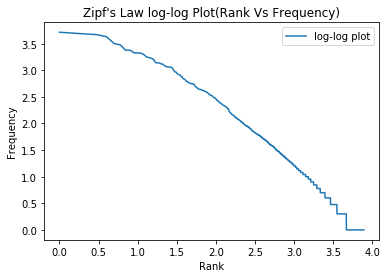

In [129]:
import matplotlib.pyplot as plt                                 #importing matlpotlib
import csv            
from math import log

def convertList(list_String):                                   #function to convert list of values to log values 
    listin=list_String[1:]
    listin=[int(i) for i in listin]
    loglist=[log(xi,10) for xi in listin]
    return loglist

x=[]
y=[]

with open('zipfs_law.csv','r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        x.append(row[1])                                        #appending data to x's list
        y.append(row[2])                                        #appending data to y's list

finalx = convertList(x)                                         #creating a list of log values   
finaly = convertList(y)                                     

plt.plot(finalx,finaly, label='log-log plot')                   #plotting an x,y plot of log values of x & y
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law log-log Plot(Rank Vs Frequency)")
plt.legend()
plt.show()

# ZIPF's Law Conclusion

According to Zipf's law the frequency of any word is inversely proportional to its rank in the frequency table and Zipf's law is most easily observed by plotting the data on a log-log graph with the axes being log(rank order) and log(frequency).
It also states that the data conform to ZIPF'S LAW to the extent that the plot is linear.After plotting the graph, log(Rank) vs log(Frequency) for austen-emma.txt, the graph obtained is linear, hence proving Zipf's law